In [24]:
import seaborn as sns
import pandas as pd

df_local = pd.read_csv("results/local.log", header=0)
df_remote = pd.read_csv("results/remote.log", header=0)

In [19]:
# all the plot functions
from typing import Literal, Tuple, Optional
from math import log10 as log
import matplotlib.pyplot as plt
import numpy as np


def format_str(df, index=None):
    if index is not None:
        return ''.join(f"{k}: {v[index]}\n" for k,v in df.to_dict().items())
    return ''.join(f"{k}: {v}\n" for k,v in df.to_dict().items())

def connection_bar(df):
    df.loc[df["function"] == "RDMAStore", "function"] = "init_store"
    connect_df = df[df["function"] == "init_store"]
    ax = sns.barplot(x="store", y="duration", data=connect_df)
    plt.show()
    
    st_d = connect_df.pivot_table(index="function", columns="store", values="duration").groupby("function")

    idx_val = "init_store"
    min_str = format_str(st_d.min(), idx_val)
    max_str = format_str(st_d.max(), idx_val)
    avg_str = format_str(st_d.mean(), idx_val)
    stdev_str = format_str(st_d.std(), idx_val)
    
    print("***Stats***")
    print(f"Min runtime (s):\n{min_str}")
    print(f"Max runtime (s):\n{max_str}")
    print(f"Avg runtime (s):\n{avg_str}")
    print(f"Standard deviation of runtime (s):\n{stdev_str}")
    
def violin_task(
    df: pd.DataFrame,
    task: Literal["store_data", "load_proxy", "load_proxy_cached"],
    exp_range: Optional[Tuple[int, int]]=None
):
    pd.options.mode.chained_assignment = None
    io_df = df[df["function"] == task]
    io_df["size_exp"] = io_df["size"].apply(lambda x: log(x) /  log(2)).astype(int)
    
    if exp_range is not None:
        io_df = io_df.loc[(io_df["size_exp"] >= exp_range[0]) & (io_df["size_exp"] < exp_range[1])]
        
    ax = sns.barplot(x="size_exp", y="duration", hue="store", data=io_df)
    plt.show()
    
    
    pivot_df = io_df.pivot_table(index="size_exp",
                                 columns="store",
                                 values="duration",
                                 aggfunc=[np.min, np.max, np.mean, np.std])
    
    min_str = format_str(pivot_df.min()["amin"])
    max_str = format_str(pivot_df.max()["amax"])
    avg_str = format_str(pivot_df.mean()["mean"])
    stdev_str = format_str(pivot_df.std()["std"])
    
    print("***Stats***")
    print(f"Min runtime (s):\n{min_str}")
    print(f"Max runtime (s):\n{max_str}")
    print(f"Avg runtime (s):\n{avg_str}")
    print(f"Standard deviation of runtime (s):\n{stdev_str}")


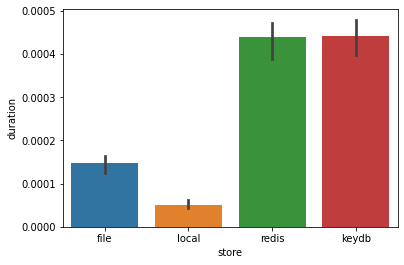

***Stats***
Min runtime (s):
file: 0.0001482826
keydb: 0.0004429632
local: 5.1208199999999995e-05
redis: 0.00043990269999999996

Max runtime (s):
file: 0.0001482826
keydb: 0.0004429632
local: 5.1208199999999995e-05
redis: 0.00043990269999999996

Avg runtime (s):
file: 0.0001482826
keydb: 0.0004429632
local: 5.1208199999999995e-05
redis: 0.00043990269999999996

Standard deviation of runtime (s):
file: nan
keydb: nan
local: nan
redis: nan



In [3]:
connection_bar(df_local)

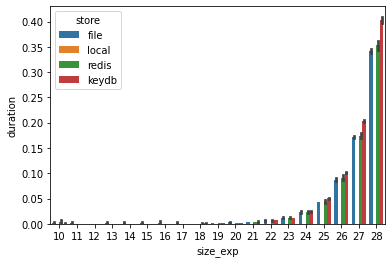

***Stats***
Min runtime (s):
file: 7.0528e-05
keydb: 0.000223439
local: 1.0755e-05
redis: 0.000197411

Max runtime (s):
file: 0.352221991
keydb: 0.421450276
local: 0.000153889
redis: 0.375337386

Avg runtime (s):
file: 0.037287981526315794
keydb: 0.042917139910526314
local: 2.026386842105263e-05
redis: 0.037803566736842105

Standard deviation of runtime (s):
file: 0.0018748034529088085
keydb: 0.002407556765678011
local: 8.029820022150286e-06
redis: 0.00449784378146417



In [22]:
violin_task(df_local, "store_data")

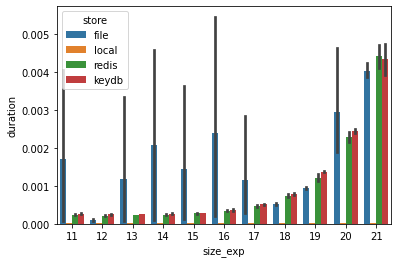

***Stats***
Min runtime (s):
file: 7.0528e-05
keydb: 0.000223439
local: 1.0755e-05
redis: 0.000197411

Max runtime (s):
file: 0.015316102
keydb: 0.004921618
local: 2.0818000000000003e-05
redis: 0.004922195

Avg runtime (s):
file: 0.0016843918
keydb: 0.001015238418181818
local: 1.247799090909091e-05
redis: 0.0009761310909090909

Standard deviation of runtime (s):
file: 0.001773683368350579
keydb: 0.0001994441310741013
local: 9.391160411381589e-07
redis: 0.00015514338081202352



In [5]:
violin_task(df_local, "store_data", (11, 22))

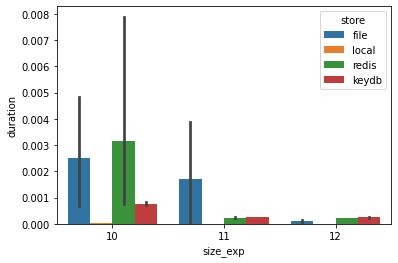

***Stats***
Min runtime (s):
file: 7.0528e-05
keydb: 0.000223439
local: 1.1046e-05
redis: 0.000197411

Max runtime (s):
file: 0.008901241
keydb: 0.000980642
local: 3.7002e-05
redis: 0.024308801

Avg runtime (s):
file: 0.0014468522
keydb: 0.0004257049
local: 1.857633333333333e-05
redis: 0.0012022358666666669

Standard deviation of runtime (s):
file: 0.0019768097039836474
keydb: 5.444830712008816e-05
local: 1.3120360993092687e-06
redis: 0.004281923474295316



In [6]:
violin_task(df_local, "store_data", (10, 13))

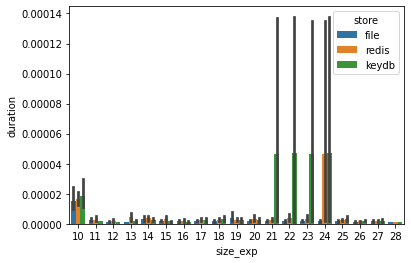

***Stats***
Min runtime (s):
file: 1.1690000000000002e-06
keydb: 1.257e-06
redis: 1.266e-06

Max runtime (s):
file: 5.0740000000000005e-05
keydb: 0.000454317
redis: 0.000443379

Avg runtime (s):
file: 2.820278947368421e-06
keydb: 1.2472152631578947e-05
redis: 5.798515789473684e-06

Standard deviation of runtime (s):
file: 3.0269719444536944e-06
keydb: 5.8615580101471105e-05
redis: 3.14537695085348e-05



In [7]:
violin_task(df_local, "load_proxy_cached")

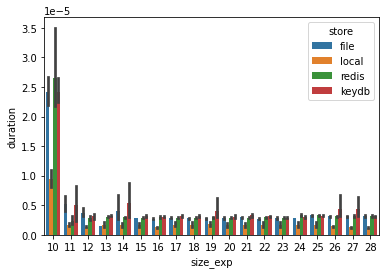

***Stats***
Min runtime (s):
file: 1.366e-06
keydb: 1.695e-06
local: 1.134e-06
redis: 1.586e-06

Max runtime (s):
file: 3.4948000000000005e-05
keydb: 3.4524000000000004e-05
local: 1.3381e-05
redis: 6.4293e-05

Avg runtime (s):
file: 4.193426315789473e-06
keydb: 4.64698947368421e-06
local: 1.992884210526316e-06
redis: 4.239657894736843e-06

Standard deviation of runtime (s):
file: 1.3308998347286415e-06
keydb: 1.892459983349282e-06
local: 5.33361144867296e-07
redis: 3.003937174664541e-06



In [8]:
violin_task(df_local, "load_proxy")

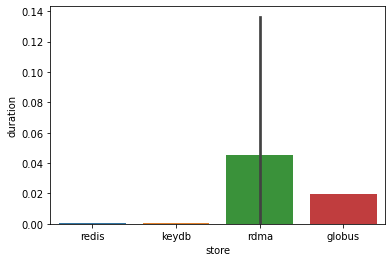

***Stats***
Min runtime (s):
globus: 0.01954185
keydb: 0.00045458879999999997
rdma: 0.0455188938
redis: 0.0004493658

Max runtime (s):
globus: 0.01954185
keydb: 0.00045458879999999997
rdma: 0.0455188938
redis: 0.0004493658

Avg runtime (s):
globus: 0.01954185
keydb: 0.00045458879999999997
rdma: 0.0455188938
redis: 0.0004493658

Standard deviation of runtime (s):
globus: nan
keydb: nan
rdma: nan
redis: nan



In [25]:
connection_bar(df_remote)

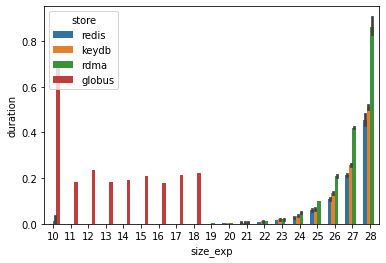

***Stats***
Min runtime (s):
globus: 0.17735463
keydb: 0.000265356
rdma: 0.000320921
redis: 0.000236244

Max runtime (s):
globus: 0.6928419450000001
keydb: 0.539875451
rdma: 1.04254343
redis: 0.5097166120000001

Avg runtime (s):
globus: 0.256783081
keydb: 0.055399840889473674
rdma: 0.08971306974210526
redis: 0.04787093168421053

Standard deviation of runtime (s):
keydb: 0.004412917601042338
rdma: 0.016312664198621558
redis: 0.009005528720629855



In [26]:
violin_task(df_remote, "store_data")

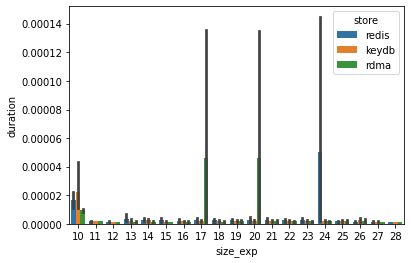

***Stats***
Min runtime (s):
keydb: 1.2030000000000002e-06
rdma: 1.1410000000000002e-06
redis: 1.146e-06

Max runtime (s):
keydb: 0.000115537
rdma: 0.000450091
redis: 0.000472006

Avg runtime (s):
keydb: 2.9911210526315793e-06
rdma: 6.753689473684211e-06
redis: 5.506510526315789e-06

Standard deviation of runtime (s):
keydb: 7.352995775988862e-06
rdma: 4.435447108439012e-05
redis: 3.360298582527999e-05



In [27]:
violin_task(df_remote, "load_proxy_cached")

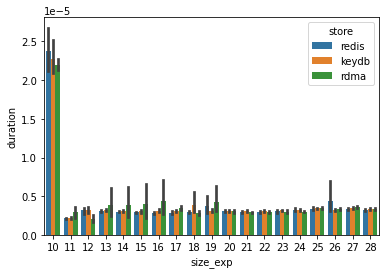

***Stats***
Min runtime (s):
keydb: 1.7360000000000002e-06
rdma: 1.364e-06
redis: 1.5020000000000002e-06

Max runtime (s):
keydb: 3.1971e-05
rdma: 2.3795e-05
redis: 3.2689000000000005e-05

Avg runtime (s):
keydb: 4.204584210526316e-06
rdma: 4.329468421052632e-06
redis: 4.224031578947369e-06

Standard deviation of runtime (s):
keydb: 9.594671743749163e-07
rdma: 1.5378004184742598e-06
redis: 1.362074505716266e-06



In [28]:
violin_task(df_remote, "load_proxy")